# Data Preparation

In [6]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [7]:
import warnings
warnings.filterwarnings('ignore')

In [8]:
data_path = '/kaggle/input/diabetes-dataset/diabetes.csv'

In [9]:
df = pd.read_csv(data_path)
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


In [10]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,769.000000,769.000000,769.000000,769.000000,769.000000,769.000000,769.000000,769.000000,769.000000
mean,3.840052,120.897269,69.115735,20.509753,79.697009,31.998179,0.471590,33.269181,0.349805
std,3.370237,31.951886,19.345296,15.959020,115.203999,7.880557,0.331208,11.778737,0.477219
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.244000,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,29.000000,32.000000,0.371000,29.000000,0.000000
75%,6.000000,140.000000,80.000000,32.000000,127.000000,36.600000,0.626000,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [11]:
df["BMI"]=df['BMI'].replace(0,df['BMI'].mean())
df['Insulin']=df['Insulin'].replace(0,df['Insulin'].mean())
df['SkinThickness']=df['SkinThickness'].replace(0,df['SkinThickness'].mean())
df['BloodPressure']=df['BloodPressure'].replace(0,df['BloodPressure'].mean())
df['Glucose']=df['Glucose'].replace(0,df['Glucose'].mean())

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 769 entries, 0 to 768
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               769 non-null    int64  
 1   Glucose                   769 non-null    float64
 2   BloodPressure             769 non-null    float64
 3   SkinThickness             769 non-null    float64
 4   Insulin                   769 non-null    float64
 5   BMI                       769 non-null    float64
 6   DiabetesPedigreeFunction  769 non-null    float64
 7   Age                       769 non-null    int64  
 8   Outcome                   769 non-null    int64  
dtypes: float64(6), int64(3)
memory usage: 54.2 KB


# Data Distributions

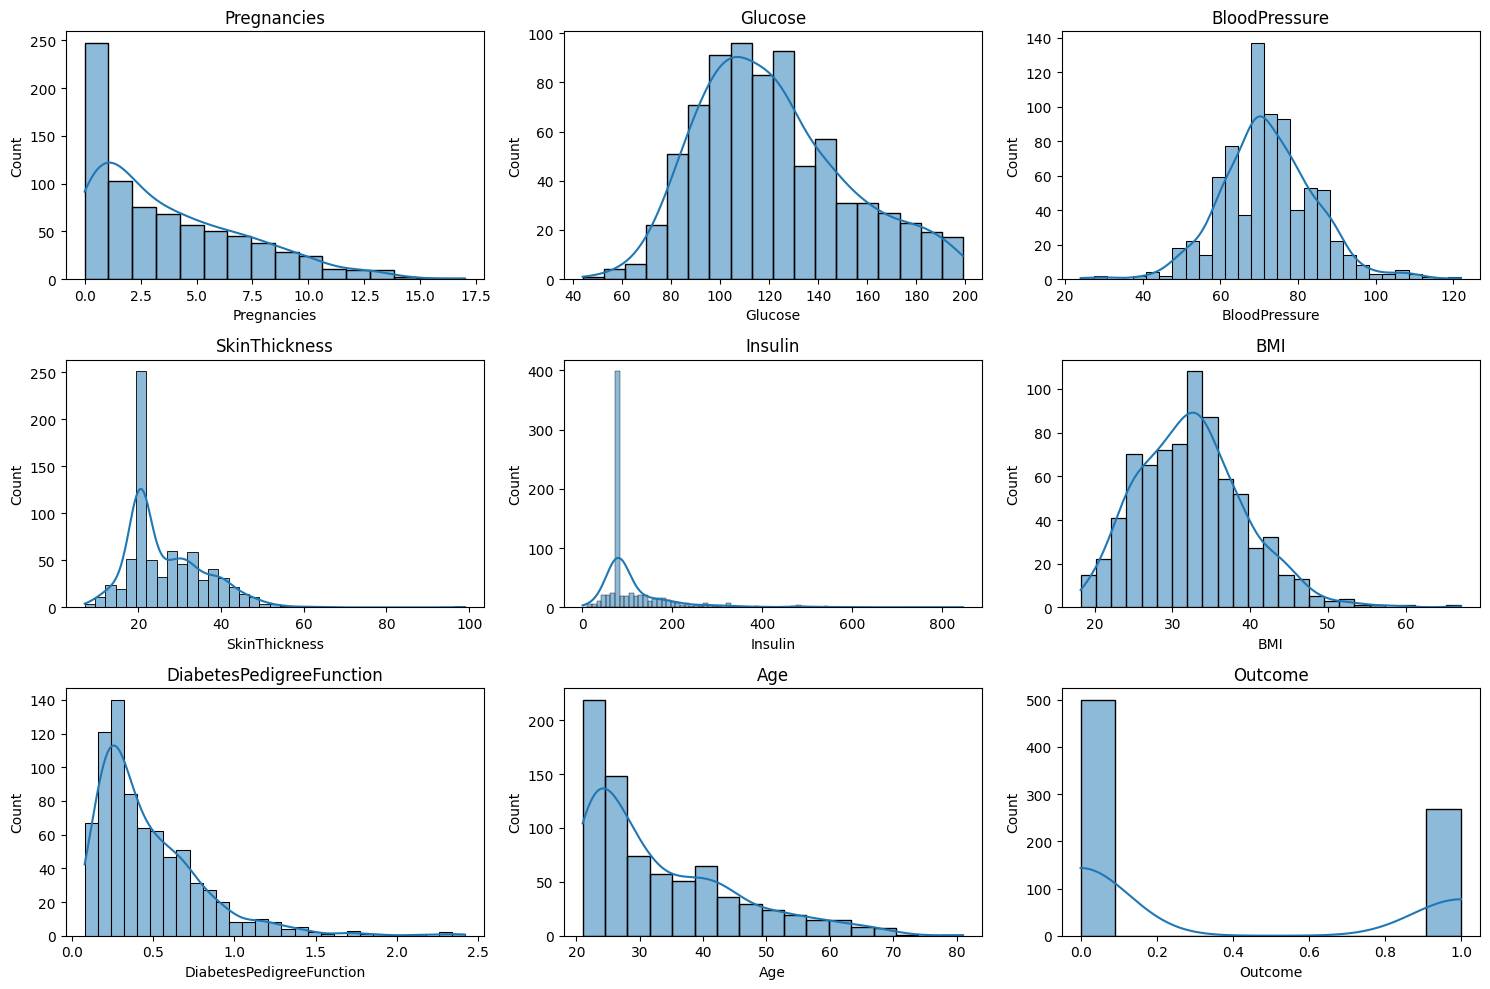

In [13]:
cols = df.columns
n_cols = len(cols)

fig, axes = plt.subplots(3, 3, figsize=(15, 10))
axes = axes.flatten()

for i, col in enumerate(cols):
    sns.histplot(df[col], ax=axes[i], kde=True)
    axes[i].set_title(col)

for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

# Correlations

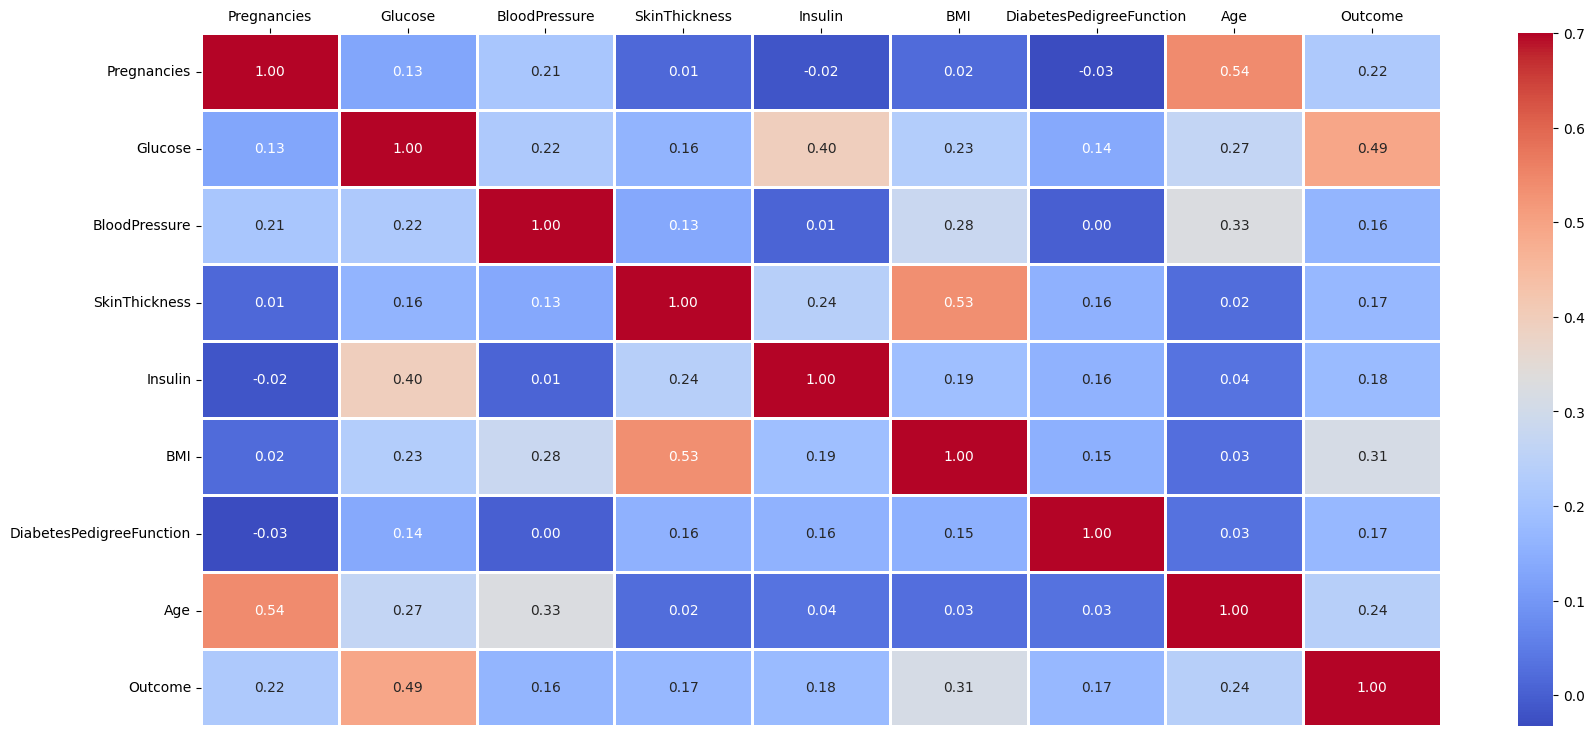

In [14]:
correlations = df.corr()
plt.figure(figsize=(20,9))
ax = sns.heatmap(correlations, annot=True, linewidth=2,fmt='.2f', cmap='coolwarm', vmax=0.7)
ax.xaxis.tick_top()
plt.show()

# Descriptive Analysis

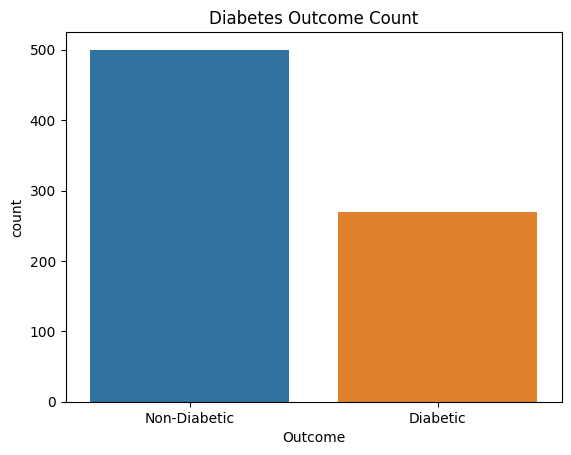

In [28]:
sns.countplot(data=df, x='Outcome')
plt.title('Diabetes Outcome Count')
plt.xticks([0, 1], ['Non-Diabetic', 'Diabetic'])
plt.show()


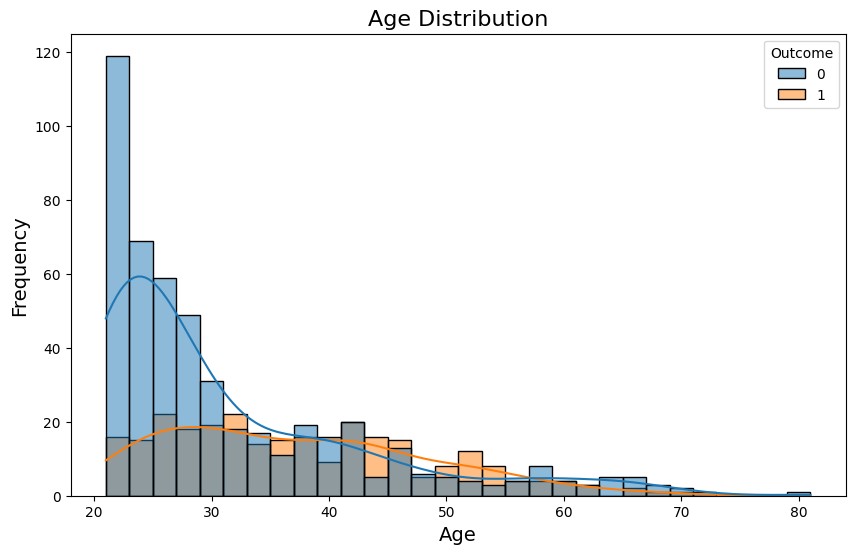

In [15]:
plt.figure(figsize=(10,6))
sns.histplot(data=df, x='Age', bins=30, kde=True, hue='Outcome')

plt.title('Age Distribution', fontsize=16)
plt.xlabel("Age", fontsize=14)
plt.ylabel("Frequency", fontsize=14)
plt.show()

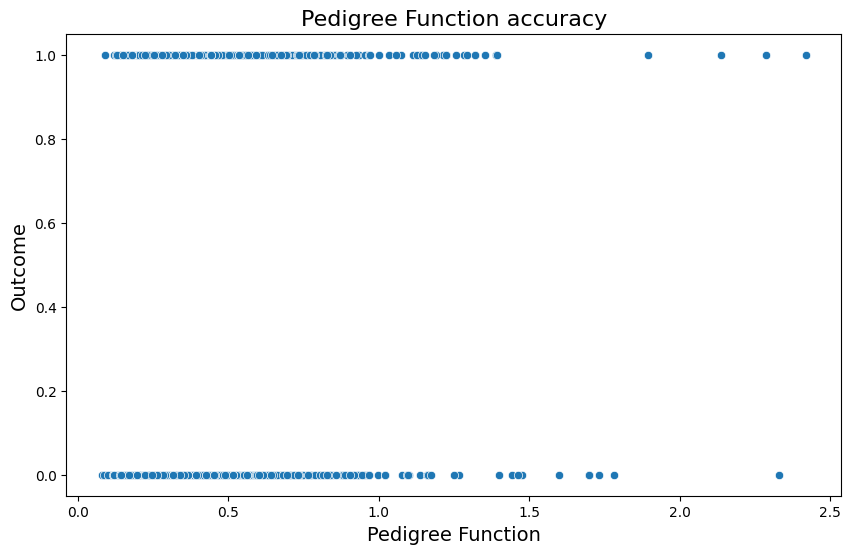

In [16]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=df, x='DiabetesPedigreeFunction', y='Outcome')

plt.title('Pedigree Function accuracy', fontsize=16)
plt.xlabel("Pedigree Function", fontsize=14)
plt.ylabel("Outcome", fontsize=14)
plt.show()

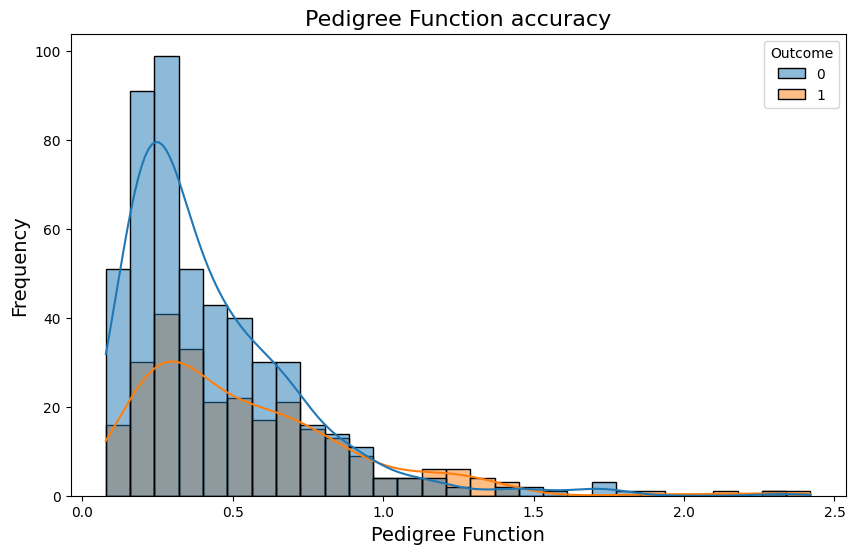

In [17]:
plt.figure(figsize=(10,6))
sns.histplot(data=df, x='DiabetesPedigreeFunction', hue='Outcome', kde=True)

plt.title('Pedigree Function accuracy', fontsize=16)
plt.xlabel("Pedigree Function", fontsize=14)
plt.ylabel("Frequency", fontsize=14)
plt.show()

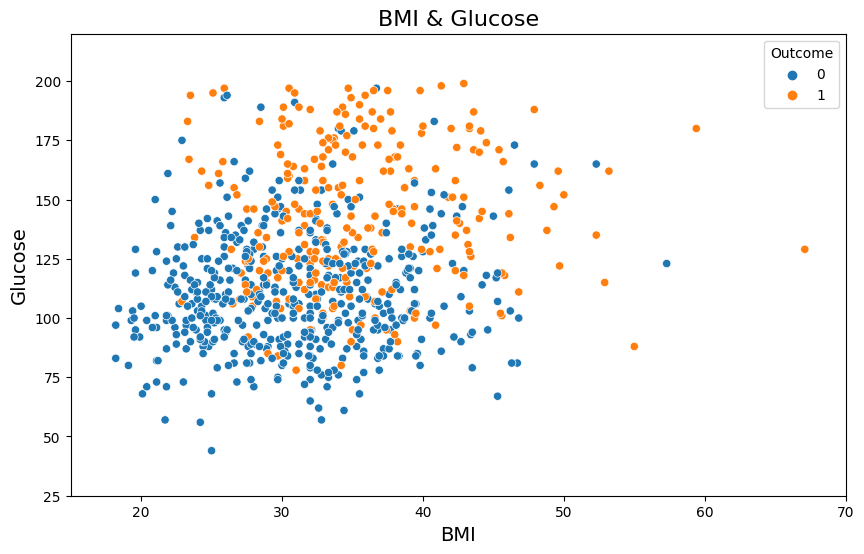

In [18]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=df, x='BMI', y='Glucose', hue='Outcome')

plt.xlim(15, 70)
plt.ylim(25, 220)
plt.title('BMI & Glucose', fontsize=16)
plt.xlabel("BMI", fontsize=14)
plt.ylabel("Glucose", fontsize=14)
plt.show()

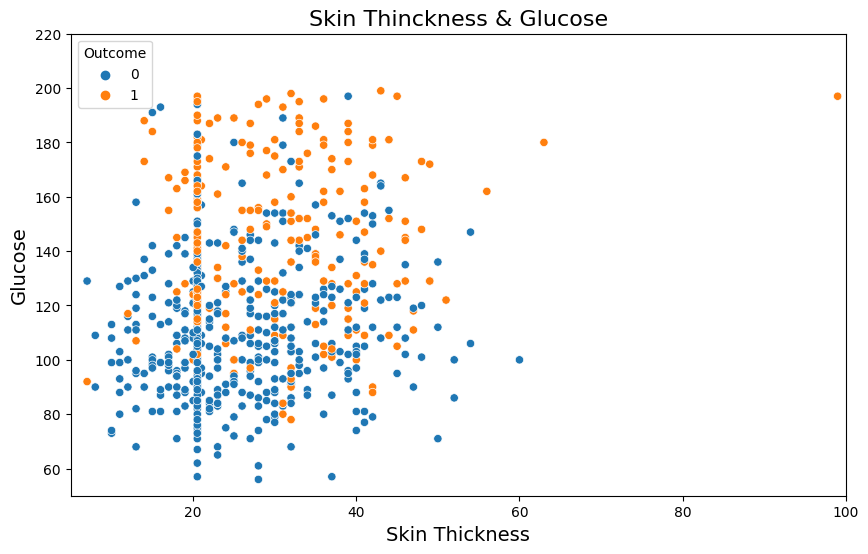

In [19]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=df, x='SkinThickness', y='Glucose', hue='Outcome')

plt.xlim(5, 100)
plt.ylim(50, 220)
plt.title('Skin Thinckness & Glucose', fontsize=16)
plt.xlabel("Skin Thickness", fontsize=14)
plt.ylabel("Glucose", fontsize=14)
plt.show()

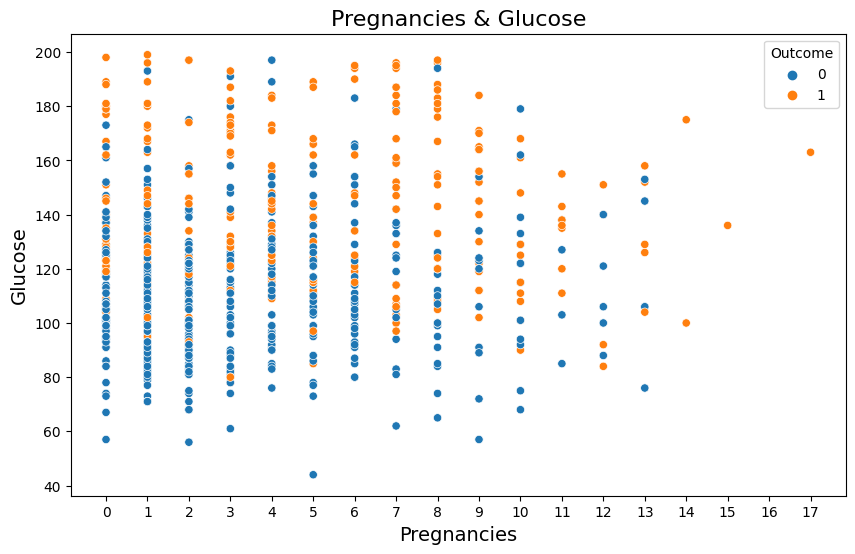

In [20]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=df, x='Pregnancies', y='Glucose', hue='Outcome')

plt.xticks(range(0, 18, 1))
plt.title('Pregnancies & Glucose', fontsize=16)
plt.xlabel("Pregnancies", fontsize=14)
plt.ylabel("Glucose", fontsize=14)
plt.show()

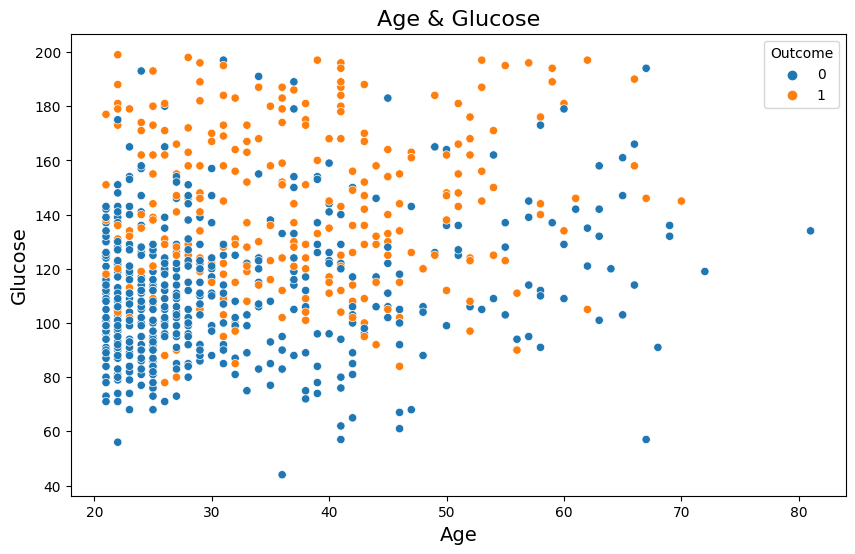

In [21]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=df, x='Age', y='Glucose', hue='Outcome')

#plt.xlim(15, 70)
#plt.ylim(25, 220)
plt.title('Age & Glucose', fontsize=16)
plt.xlabel("Age", fontsize=14)
plt.ylabel("Glucose", fontsize=14)
plt.show()

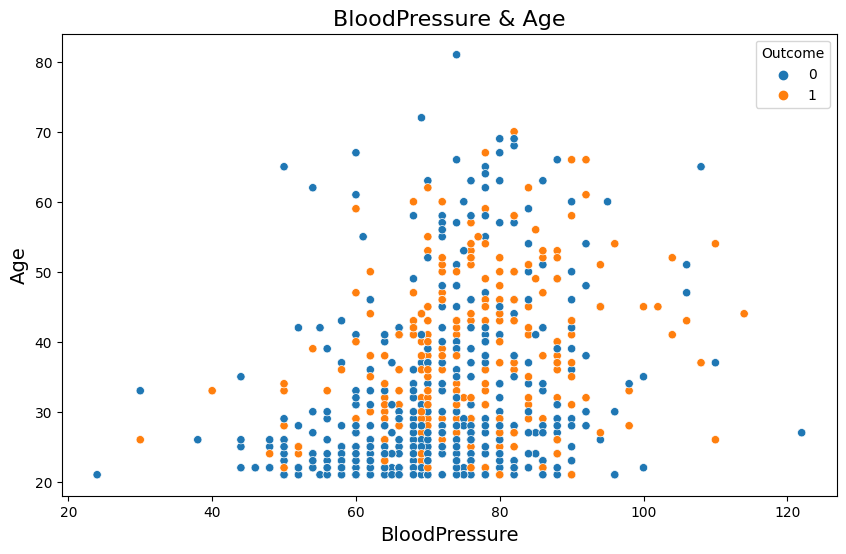

In [22]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=df, x='BloodPressure', y='Age', hue='Outcome')

#plt.xlim(15, 70)
#plt.ylim(25, 220)
plt.title('BloodPressure & Age', fontsize=16)
plt.xlabel("BloodPressure", fontsize=14)
plt.ylabel("Age", fontsize=14)
plt.show()

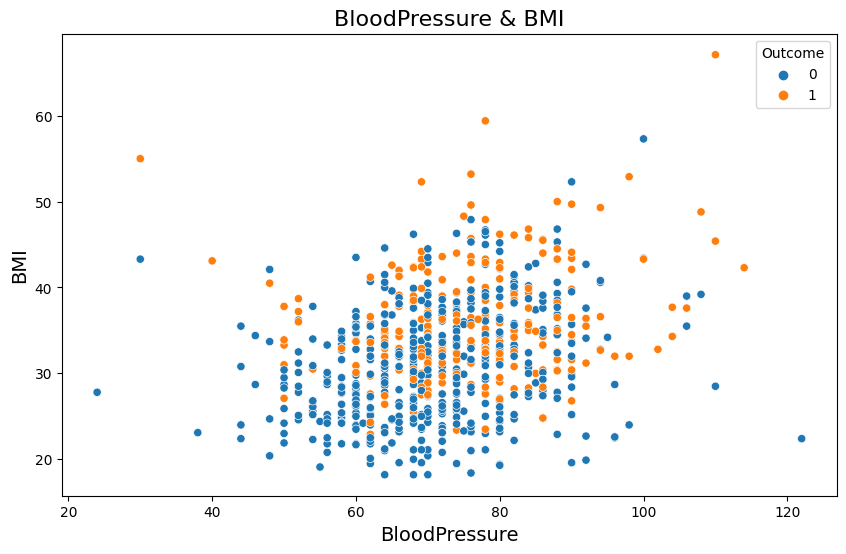

In [23]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=df, x='BloodPressure', y='BMI', hue='Outcome')

#plt.xlim(15, 70)
#plt.ylim(25, 220)
plt.title('BloodPressure & BMI', fontsize=16)
plt.xlabel("BloodPressure", fontsize=14)
plt.ylabel("BMI", fontsize=14)
plt.show()

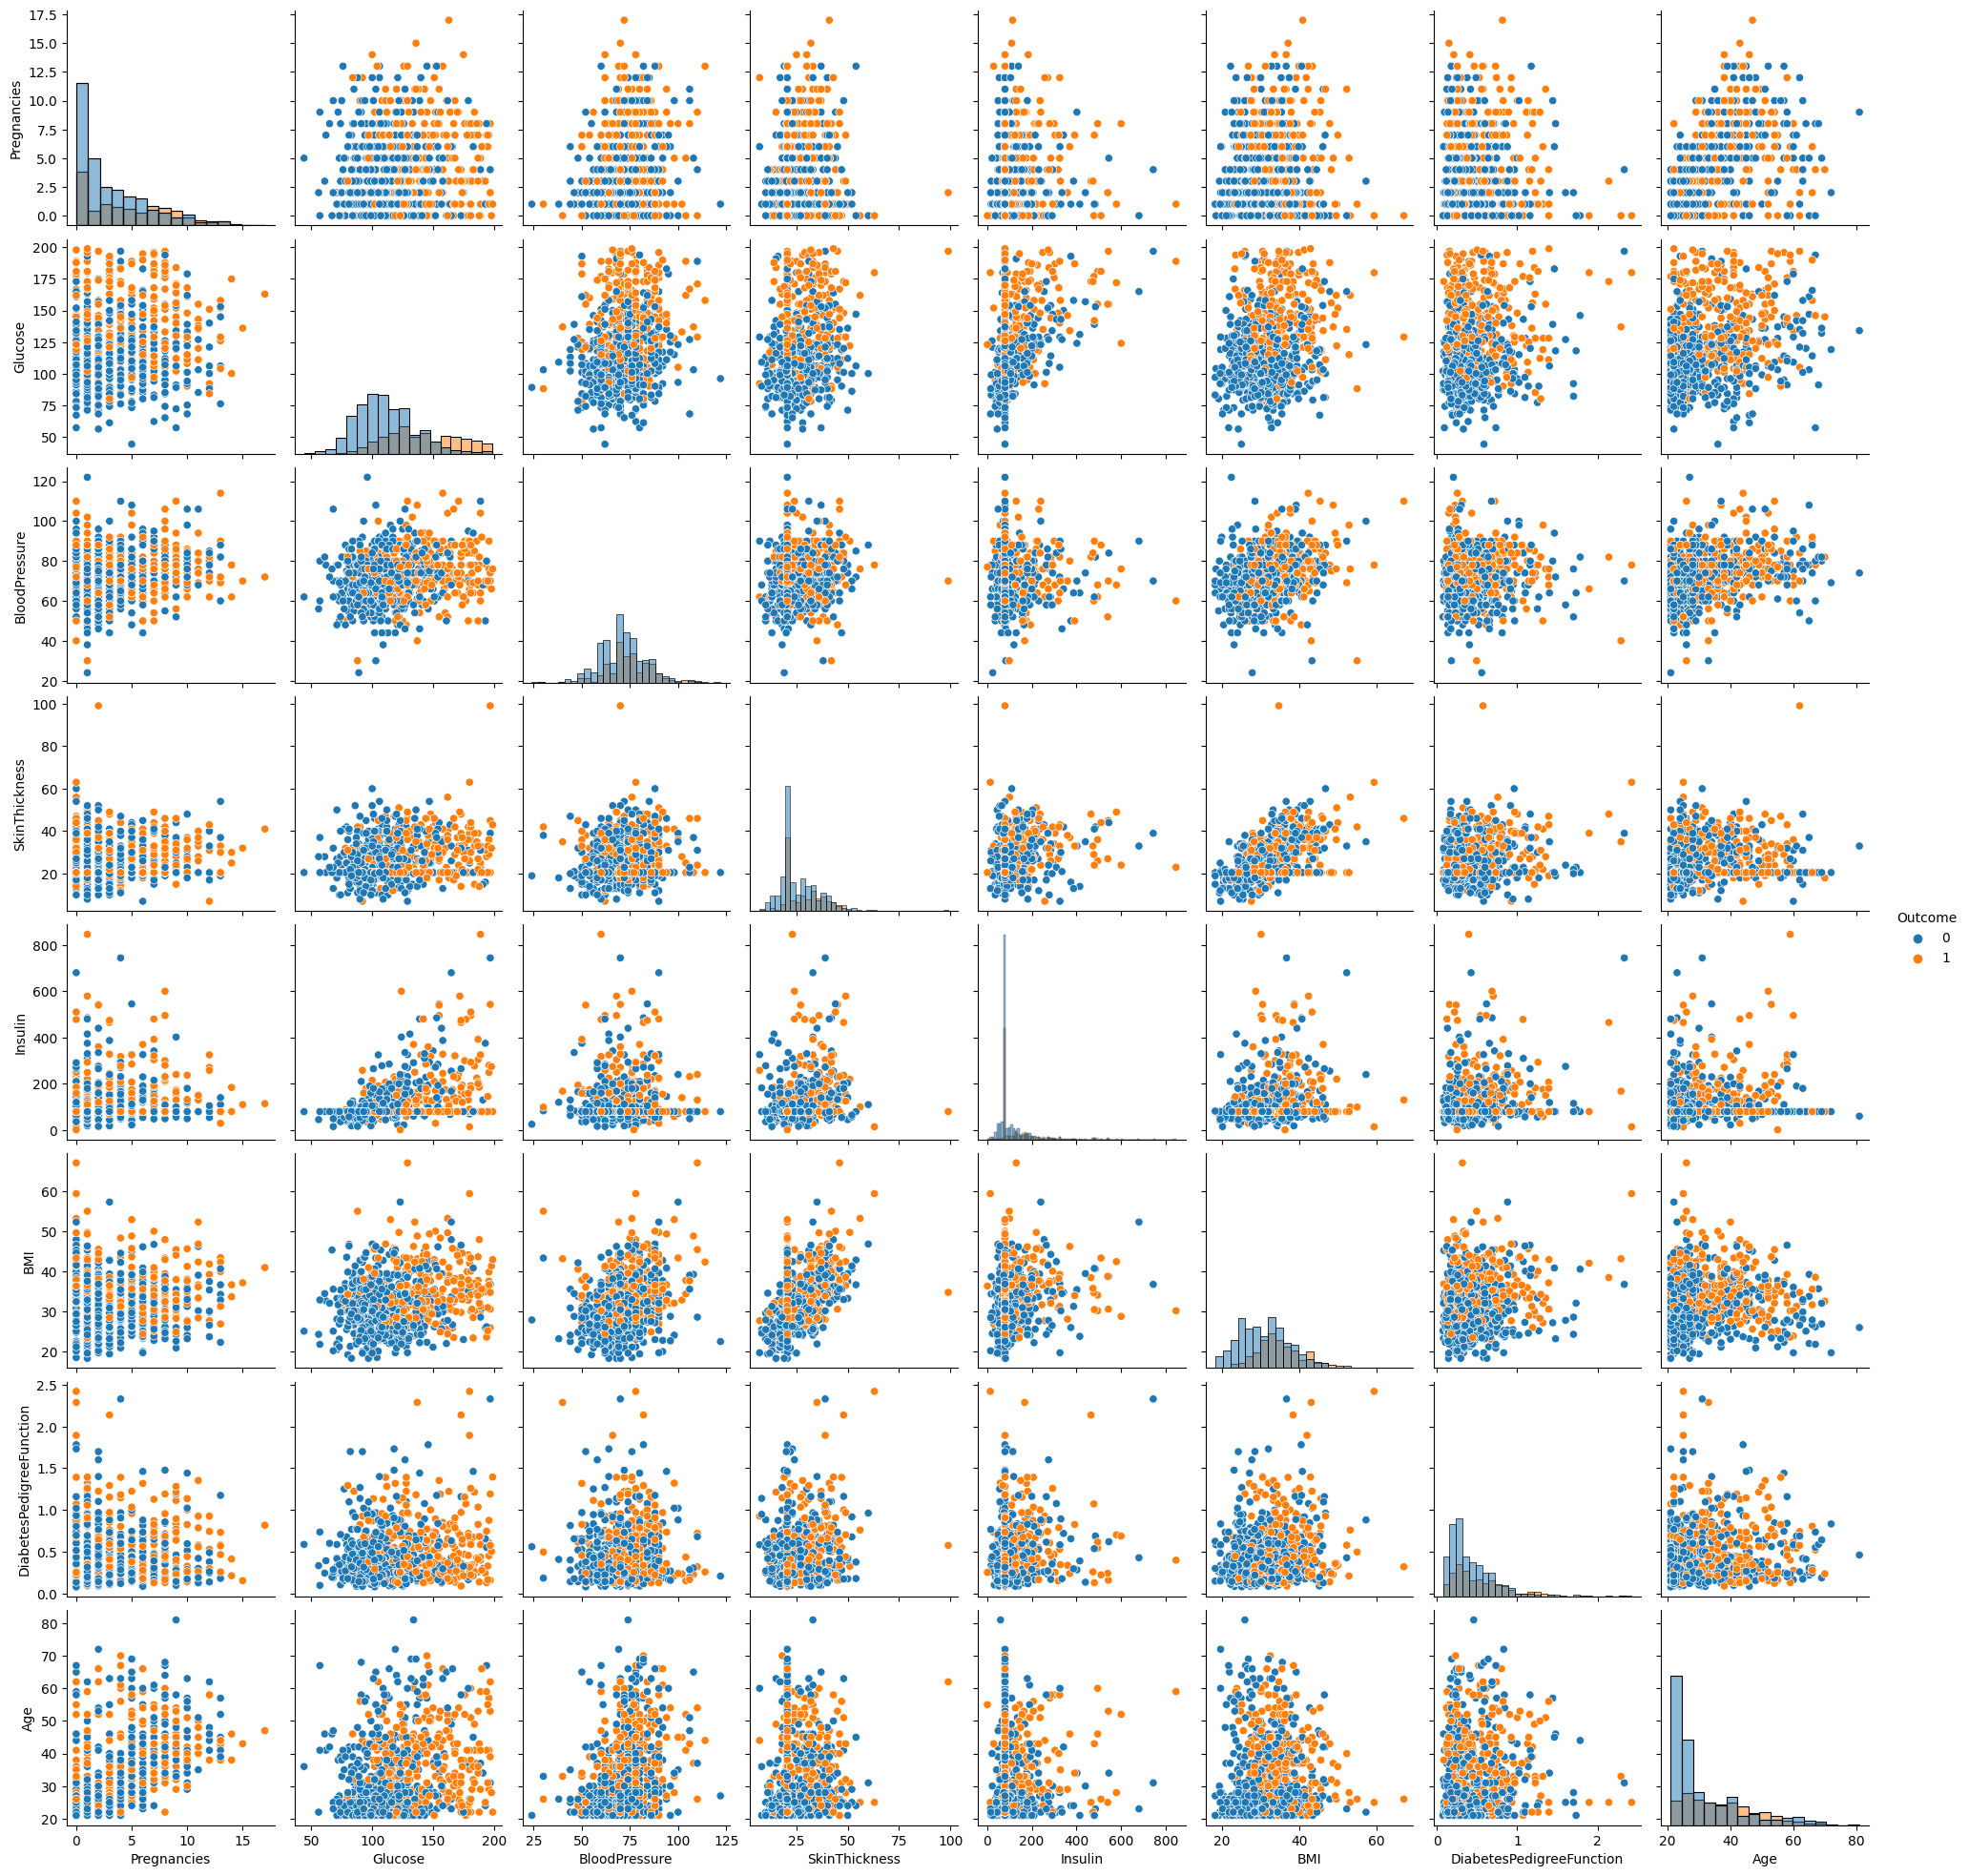

In [24]:
sns.pairplot(df,hue="Outcome",diag_kind='hist')
plt.show()